# Visualizing the results

In [2]:
import pandas as pd
import ast
df = pd.read_csv('./data/music_analysis.csv')
df.head()


,movie,colors,instruments,emotions
0,Brokeback Mountain,"[[0, 0, 0]]",[],['sad-lonely']
1,The Pianist,"[[6, 13, 15], [46, 67, 91], [104, 139, 148], [...",['Piano'],['sad-lonely']
2,Sing Street,"[[0, 0, 0]]",[],['happy-pleased']
3,Grave of the Fireflies,"[[0, 0, 0]]",[],['sad-lonely']
4,Spider-Man: No Way Home,"[[183, 131, 56], [253, 144, 159], [67, 66, 53]...","['Violin, fiddle']",['amazed-suprised']


In [3]:
df_encoded = pd.read_csv('./data/music_analysis_encoded.csv')
df_encoded.head()


,movie,Piano,"Violin, fiddle",amazed-suprised,happy-pleased,quiet-still,relaxing-calm,sad-lonely
0,Brokeback Mountain,0,0,0,0,0,0,1
1,The Pianist,1,0,0,0,0,0,1
2,Sing Street,0,0,0,1,0,0,0
3,Grave of the Fireflies,0,0,0,0,0,0,1
4,Spider-Man: No Way Home,0,1,1,0,0,0,0


In [4]:
from sklearn.preprocessing import MultiLabelBinarizer
df = pd.read_csv('./data/music_analysis.csv')
df['instruments'] = df['instruments'].apply(ast.literal_eval)
df['emotions'] = df['emotions'].apply(ast.literal_eval)

mlb_instruments = MultiLabelBinarizer()
instruments_encoded = pd.DataFrame(mlb_instruments.fit_transform(df['instruments']),
                                   columns=mlb_instruments.classes_)

mlb_emotions = MultiLabelBinarizer()
emotions_encoded = pd.DataFrame(mlb_emotions.fit_transform(df['emotions']),
                                columns=mlb_emotions.classes_)


df_encoded = pd.concat([df[['movie']], instruments_encoded, emotions_encoded], axis=1)

#save the encoded dataframe to a csv
df_encoded.to_csv('./data/music_analysis_encoded.csv', index=False)

In [5]:
# #aggregate by movie
df = pd.read_csv('./data/music_analysis.csv')
movie_group = df.groupby('movie').agg(lambda lists: list(set(item  for item in lists ))[0]).reset_index()
movie_group['colors'] = df['colors'].apply(ast.literal_eval)
movie_group.head()

,movie,colors,instruments,emotions
0,A Ghost Story,"[[0, 0, 0]]",['Piano'],['quiet-still']
1,Arrival,"[[6, 13, 15], [46, 67, 91], [104, 139, 148], [...","['Violin, fiddle']","['relaxing-calm', 'quiet-still']"
2,Arrival2,"[[0, 0, 0]]",['Piano'],['quiet-still']
3,Boyhood,"[[0, 0, 0]]",[],['quiet-still']
4,Brokeback Mountain,"[[183, 131, 56], [253, 144, 159], [67, 66, 53]...",[],['sad-lonely']


In [6]:
df_encoded.value_counts()
# df['instruments'].value_counts()

movie                     Piano  Violin, fiddle  amazed-suprised  happy-pleased  quiet-still  relaxing-calm  sad-lonely
A Ghost Story             1      0               0                0              1            0              0             1
Arrival                   0      1               0                0              1            1              0             1
Paddington 2              0      0               0                1              0            0              0             1
Paterson                  0      0               0                0              1            0              0             1
Requiem for a Dream       0      0               0                0              0            0              1             1
Sing Street               0      0               0                1              0            0              0             1
Spider-Man: No Way Home   0      1               1                0              0            0              0             1
Star 

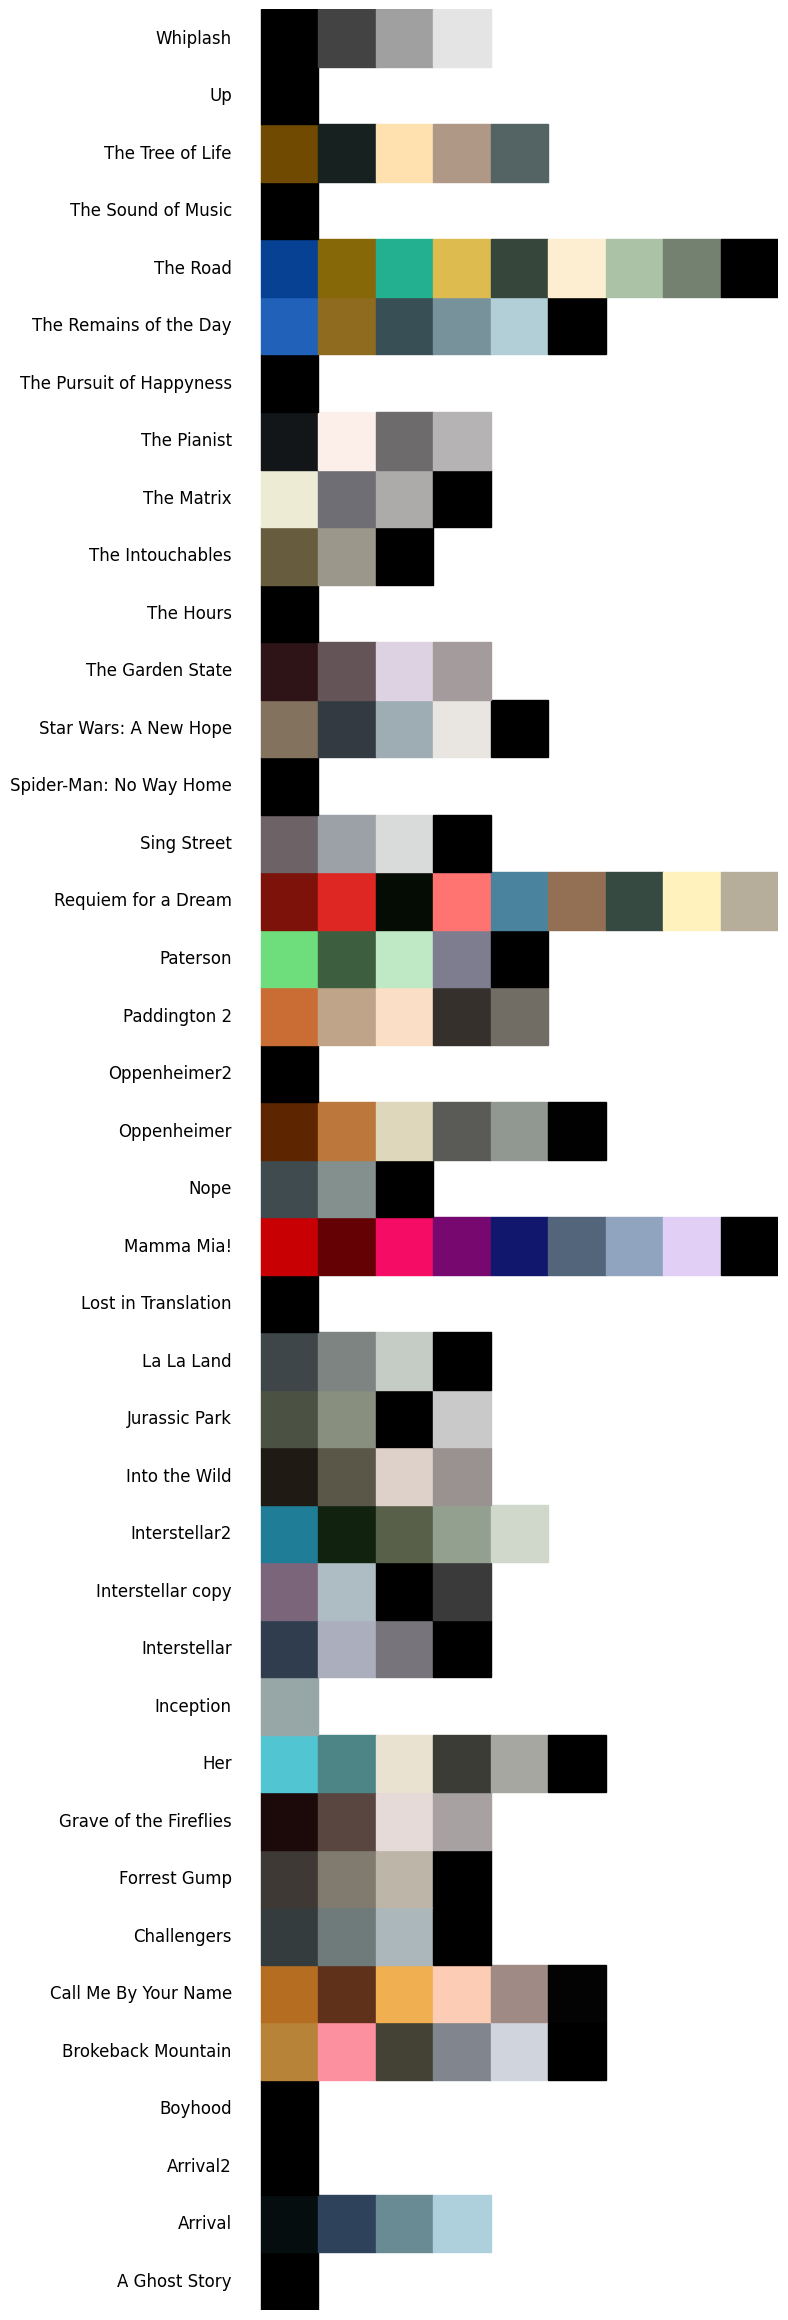

In [7]:
import matplotlib.pyplot as plt
df = pd.read_csv('./data/music_analysis.csv')
df['instruments'] = df['instruments'].apply(ast.literal_eval)
df['emotions'] = df['emotions'].apply(ast.literal_eval)
df['colors'] = df['colors'].apply(ast.literal_eval)
def normalize(colors):
    return [[r/255, g/255, b/255] for [r, g, b] in colors]

# Plot
fig, ax = plt.subplots(figsize=(8, 2 * len(movie_group)))
# df['colors'] = df['colors'].apply(ast.literal_eval)
movie_group.head()
for idx, row in movie_group.iterrows():
    colors = normalize(row['colors'])
    for i, color in enumerate(colors):
        rect = plt.Rectangle((i, idx), 1, 1, color=color)
        ax.add_patch(rect)
    ax.text(-0.5, idx + 0.5, row['movie'], va='center', ha='right', fontsize=12)

ax.set_xlim(-2, max(len(c) for c in movie_group['colors']))
ax.set_ylim(0, len(movie_group))
ax.set_aspect('equal')
ax.axis('off')

plt.tight_layout()
plt.show()

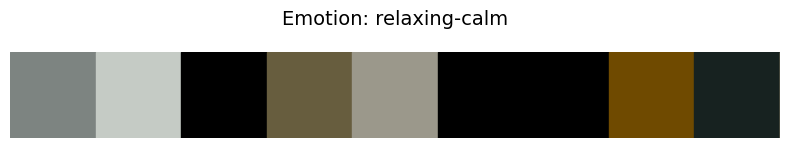

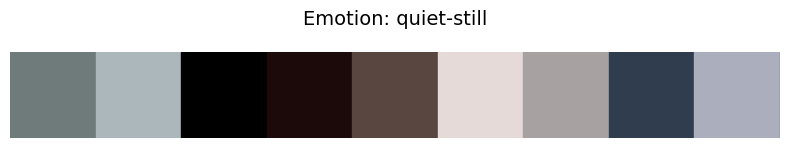

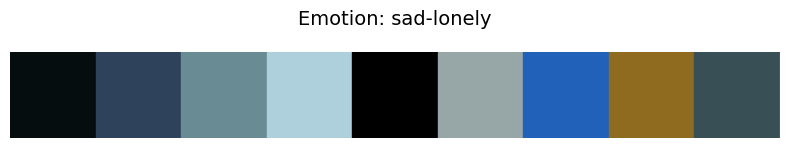

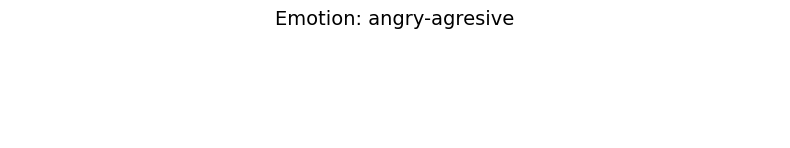

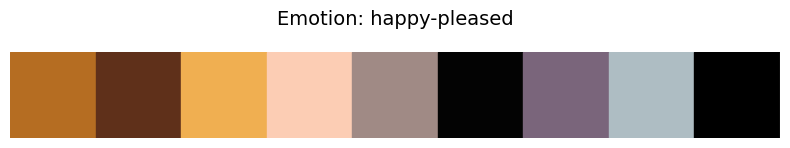

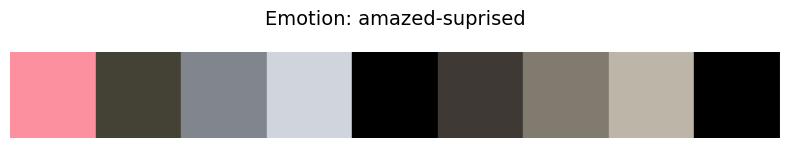

In [12]:
#a list of colors for all movies with a sad emotion label
def plot_emotion_colors(emotion):
    emotion_colors = []
    for idx, row in df.iterrows():
        if emotion in row['emotions']:
            emotion_colors.extend(row['colors'])
    # Normalize the colors
    emotion_colors = normalize(emotion_colors)
    # Plot
    fig, ax = plt.subplots(figsize=(8, 2))
    row = -1
    for i, color in enumerate(emotion_colors):
        rect = plt.Rectangle((i, row), 1, 1, color=color)
        if i%10 == 0:
            row +=1
        ax.add_patch(rect)

    ax.set_xlim(1, 10)
    ax.set_ylim(0, 1)
    ax.set_aspect('equal')
    ax.axis('off')
  
    ax.set_title(f"Emotion: {emotion}", fontsize=14, pad=20)
    plt.tight_layout()
    plt.show()
plot_emotion_colors('relaxing-calm')
plot_emotion_colors('quiet-still')
plot_emotion_colors('sad-lonely')
plot_emotion_colors('angry-agresive')
plot_emotion_colors('happy-pleased')
plot_emotion_colors('amazed-suprised')